<a href="https://colab.research.google.com/github/giyuntf2/KBDB_Project/blob/main/%EC%BC%80%EB%BD%80_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Columns Meaning

ID: ID 고객 수.

창고 블록: 회사는 A,B,C,D,E와 같은 블록으로 나누어진 큰 창고를 가지고 있다.

발송 모드:회사는 선박, 비행 및 도로와 같은 다양한 방법으로 제품을 배송합니다.

고객 관리 전화: 발송에 대한 문의에서 걸려온 전화 수입니다.

고객 등급: 그 회사는 모든 고객으로부터 등급을 매겼다. 1이 가장 낮음(최악), 5가 가장 높음(최고)
입니다.

제품 비용: 제품 비용(미국 달러).

이전 구매: 이전 구매 횟수입니다.

제품 중요도: 회사는 제품을 로우, 미디엄, 하이 등 다양한 파라미터로 분류했습니다.

성별: 남성과 여성.

할인 혜택: 그 특정 상품에 대해 할인해 드립니다.

중량(gms): 그것은 그램 단위의 무게이다.

정시에 도달: 대상 변수입니다. 여기서 1은 제품이 제시간에 도달하지 않았음을 나타내고 0은 제품이 
제시간에 도달했음을 나타냅니다.


In [1]:
!pip install -U pandas-profiling
!pip install --upgrade category_encoders

In [2]:
import pandas as pd
from google.colab import files

myfiles = files.upload()

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Train.csv')
df = df.drop(['ID'], axis=1)
df = df.rename(columns={'Reached.on.Time_Y.N':'ROT'})

In [ ]:
df.describe().T

In [ ]:
from category_encoders import OneHotEncoder

df = pd.read_csv('Train.csv').drop(['ID'], axis=1)
#profile = ProfileReport(df, minimal=True)
#profile

category = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
encoder = OneHotEncoder(use_cat_names=True)
df_cat = encoder.fit_transform(df[category])
df_cat

# 상관계수 분석 (제일 높은 순서 2개 진행)

## 1. 할인 혜택(Discount_offered) / 정시에 도착했는지?(Reached.on.Time_Y.N) (0.4)

    할인혜택이 있었다면, 정시에 도착했을 경우 / 아닌 경우 40%의 Positive 관계를 가짐.

## 2. 할인 혜택(Discount_offered) / 중량(Gms) (-0.38)

    할인혜택이 있었다면 무게가 늘어나고 /  줄어들고의 경우가 -38%의 Negative 관계를 가짐.

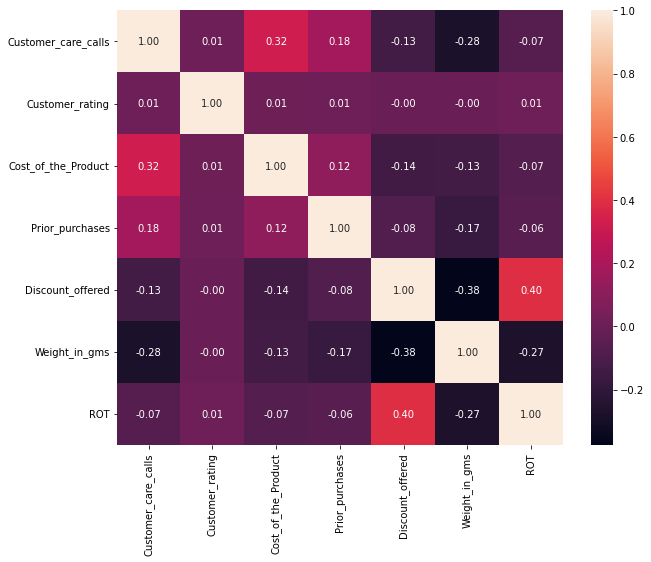

In [52]:
#상관계수 Heatmap (category data 제거)
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='0.2f', linecolor='Orange')
plt.show()

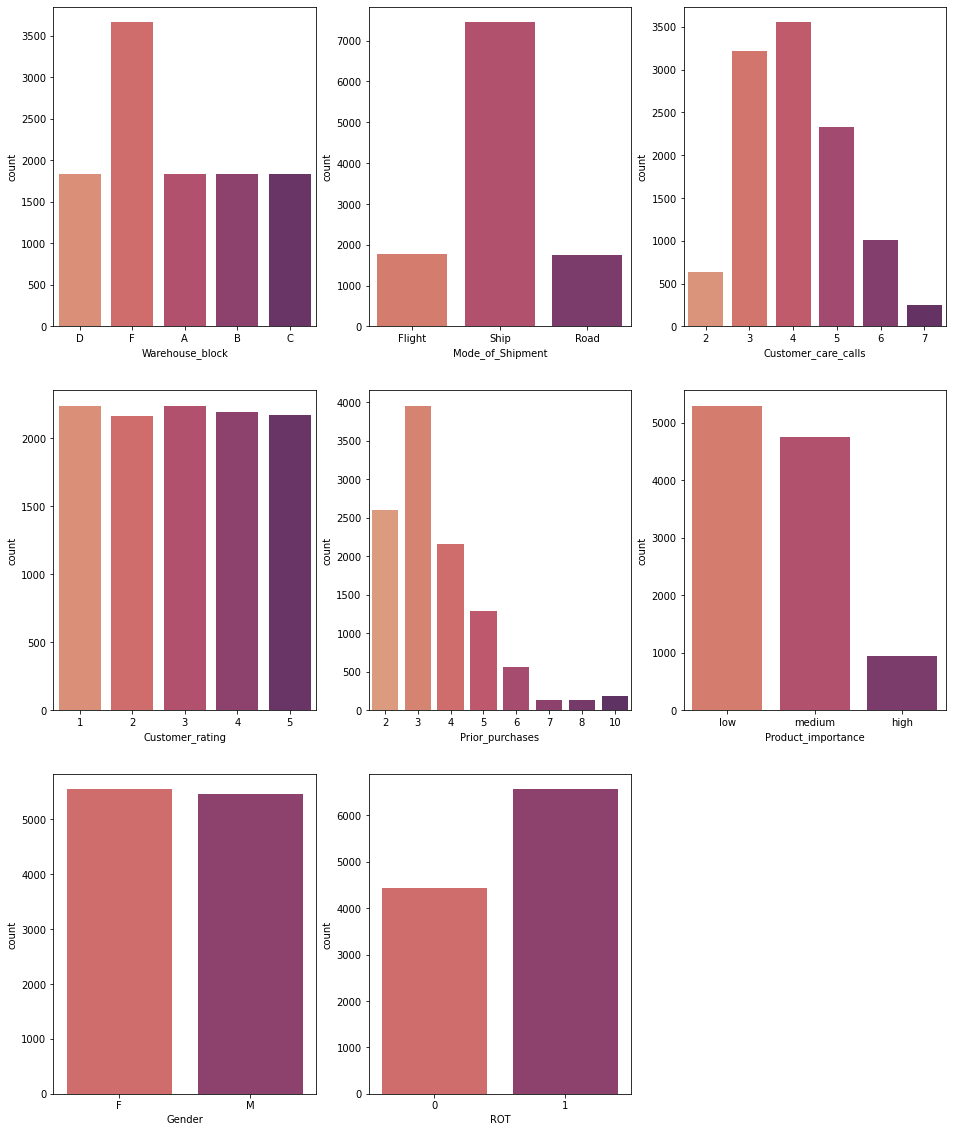

In [54]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'ROT']

sns.color_palette("flare", as_cmap=True)
plt.figure(figsize = (16, 20))
pltnum = 1

for i in range(len(cols)):
  if pltnum <= 8:
    ax = plt.subplot(3, 3, pltnum)
    sns.countplot(x = cols[i], data=df, ax=ax, palette='flare')

  pltnum += 1


# dtypes Object to pieplot

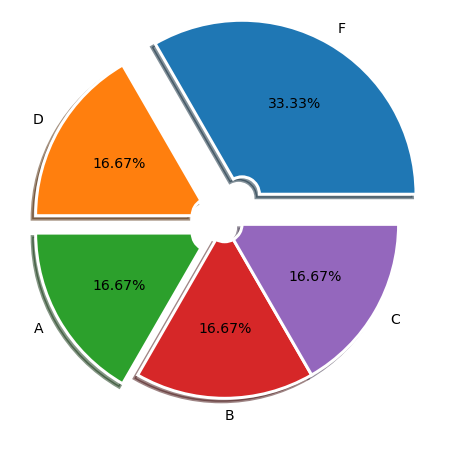

In [55]:
df_object = df.select_dtypes(include=['object'])
warehouse = df_object["Warehouse_block"].value_counts().reset_index() 
warehouse.columns = ['warehouse_block', 'counts']

def pieplot1(x):
  data = x['counts'].values.tolist()
  genre_1 = x['warehouse_block'].values.tolist()
  group_explodes = (0.2, 0.1, 0.1, 0, 0)
  wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3}

  plt.rcParams['figure.figsize'] = [12, 8]
  plt.pie(data,
        explode = group_explodes,
        shadow=True,
        startangle=0,
        autopct='%1.2f%%',
        textprops={'fontsize': 14},
        labels = genre_1,
        wedgeprops = wedgeprops)
        
  return plt.show()


pieplot1(warehouse)

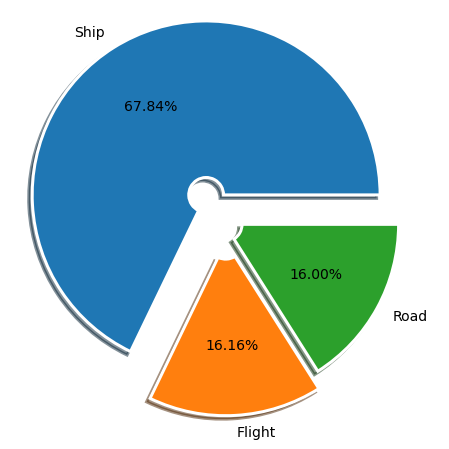

In [11]:
Mode_of_Shipment = df_object["Mode_of_Shipment"].value_counts().reset_index() 
Mode_of_Shipment.columns = ['Mode_of_Shipment', 'counts']
Mode_of_Shipment

def pieplot1(x):
  data = x['counts'].values.tolist()
  genre_1 = x['Mode_of_Shipment'].values.tolist()
  group_explodes = (0.2, 0.1, 0.0)
  wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3}

  plt.rcParams['figure.figsize'] = [12, 8]
  plt.pie(data,
        explode = group_explodes,
        shadow=True,
        startangle=0,
        autopct='%1.2f%%',
        textprops={'fontsize': 14},
        labels = genre_1,
        wedgeprops = wedgeprops)
        
  return plt.show()


pieplot1(Mode_of_Shipment)

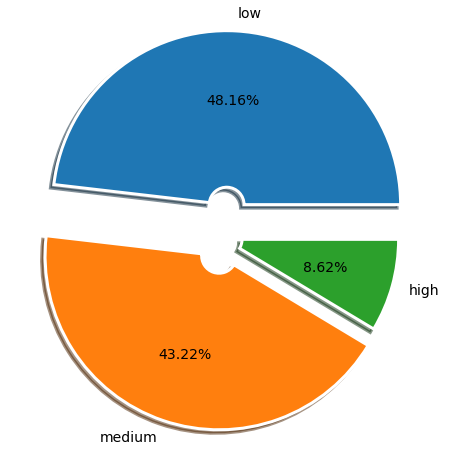

In [12]:
Product_importance = df_object["Product_importance"].value_counts().reset_index() 
Product_importance.columns = ['Product_importance', 'counts']
Product_importance

def pieplot1(x):
  data = x['counts'].values.tolist()
  genre_1 = x['Product_importance'].values.tolist()
  group_explodes = (0.2, 0.1, 0.0)
  wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3}

  plt.rcParams['figure.figsize'] = [12, 8]
  plt.pie(data,
        explode = group_explodes,
        shadow=True,
        startangle=0,
        autopct='%1.2f%%',
        textprops={'fontsize': 14},
        labels = genre_1,
        wedgeprops = wedgeprops)
        
  return plt.show()


pieplot1(Product_importance)

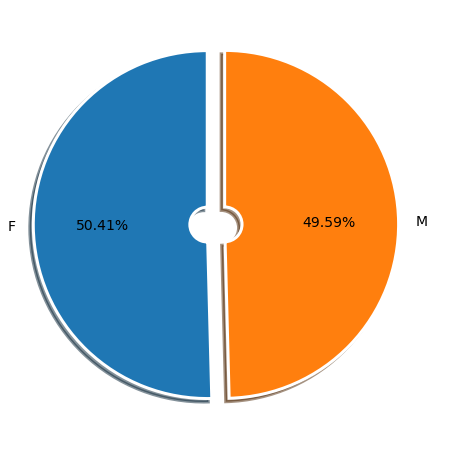

In [13]:
Gender = df_object["Gender"].value_counts().reset_index() 
Gender.columns = ['Gender', 'counts']
Gender

def pieplot1(x):
  data = x['counts'].values.tolist()
  genre_1 = x['Gender'].values.tolist()
  group_explodes = (0.1, 0.)
  wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 3}

  plt.rcParams['figure.figsize'] = [12, 8]
  plt.pie(data,
        explode = group_explodes,
        shadow=True,
        startangle=90,
        autopct='%1.2f%%',
        textprops={'fontsize': 14},
        labels = genre_1,
        wedgeprops = wedgeprops)
        
  return plt.show()


pieplot1(Gender)

In [ ]:
#https://www.kaggle.com/code/prachi13/logistic-regression

# Logistic Regression #Reached on time

In [46]:
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

#위에서 했던 상관계수로 순서분석

target = ['ROT']
feature = df.drop(target, axis=1).columns

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [ ]:
X_train, y_train = train[feature], train[target]
X_val, y_val = val[feature], val[target]
X_test, y_test = test[feature], test[target]

X_train

In [ ]:
import category_encoders
from category_encoders import OneHotEncoder

cols1 = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender']
encoder = OneHotEncoder(cols = cols1, use_cat_names=True)
X_trainw = encoder.fit_transform(X_train)
X_valw = encoder.transform(X_val)
X_testw = encoder.transform(X_test)

X_trainw

In [50]:
rob = RobustScaler()

X_train_rob = rob.fit_transform(X_trainw)
X_val_rob = rob.transform(X_valw)
X_test_rob = rob.transform(X_testw)

In [51]:
#Logisitic Regression 진행
model = LogisticRegression(max_iter=1000)

model.fit(X_train_rob, y_train)
model.score(X_val_rob, y_val)
model.score(X_test_rob, y_test)

print(f'검증 데이터 정확도 = {model.score(X_val_rob, y_val):.3f}')
print(f'테스트 데이터 정확도 = {model.score(X_test_rob, y_test):.3f}')
model.score(X_test_rob, y_test)


검증 데이터 정확도 = 0.613
테스트 데이터 정확도 = 0.640


0.6395454545454545

# Standard Scaler

In [37]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_trainw)
X_val_sc = sc.transform(X_valw)
X_test_sc = sc.transform(X_testw)

In [47]:
#Logisitic Regression 진행
model = LogisticRegression(max_iter=1000)

model.fit(X_train_sc, y_train)
model.score(X_val_sc, y_val)
model.score(X_test_sc, y_test)

print(f'검증 데이터 정확도 = {model.score(X_val_sc, y_val):.3f}')
print(f'테스트 데이터 정확도 = {model.score(X_test_sc, y_test):.3f}')

model.score(X_test_sc, y_test)


검증 데이터 정확도 = 0.613
테스트 데이터 정확도 = 0.640


0.6395454545454545

# MMSCALER

In [48]:
mmscaler = MinMaxScaler()

X_train_mm = mmscaler.fit_transform(X_trainw)
X_val_mm = mmscaler.transform(X_valw)
X_test_mm = mmscaler.transform(X_testw)

In [49]:
#Logisitic Regression 진행
model = LogisticRegression(max_iter=1000)

model.fit(X_train_mm, y_train)
model.score(X_val_mm, y_val)
model.score(X_test_mm, y_test)

print(f'검증 데이터 정확도 = {model.score(X_val_mm, y_val):.3f}')
print(f'테스트 데이터 정확도 = {model.score(X_test_mm, y_test):.3f}')

model.score(X_test_mm, y_test)


검증 데이터 정확도 = 0.614
테스트 데이터 정확도 = 0.639


0.6386363636363637